In [6]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.colors import LinearSegmentedColormap

# --- Configuration ---
# 1. Define Output Directory
output_dir = "../../analysis/Kidnay_SC/QC"
os.makedirs(output_dir, exist_ok=True)
print(f"📂 Output directory set to: {output_dir}")

# 2. Set Global Plotting Aesthetics (White Background)
sns.set_theme(context="paper", style="white",
              font="DejaVu Sans", font_scale=1.3)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

# 3. Load Data (Adjust path if necessary)
file_path = "/mnt/home3/miska/nm667/scratch/inProgress/dev/data/Kidney_SC/GSE211785_Susztak_KPMP_SC_SN_ATAC_merged_PostSCVI_final.h5ad"

if 'adata' not in locals():
    if os.path.exists(file_path):
        print("⏳ Loading AnnData...")
        adata = sc.read_h5ad(file_path)
        print(f"✅ Loaded: {adata.n_obs} cells, {adata.n_vars} genes.")
    else:
        raise FileNotFoundError(f"❌ File not found: {file_path}")


📂 Output directory set to: ../../analysis/Kidnay_SC/QC



--- Processing Plot 1: Tech vs Cell Type (Histogram) ---


/tmp/ipykernel_3112351/3885015161.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["tech", "celltype"])


💾 Data saved: ../../analysis/Kidnay_SC/QC/01_data_tech_vs_celltype_counts.csv
✅ Plot 1 saved as histogram.


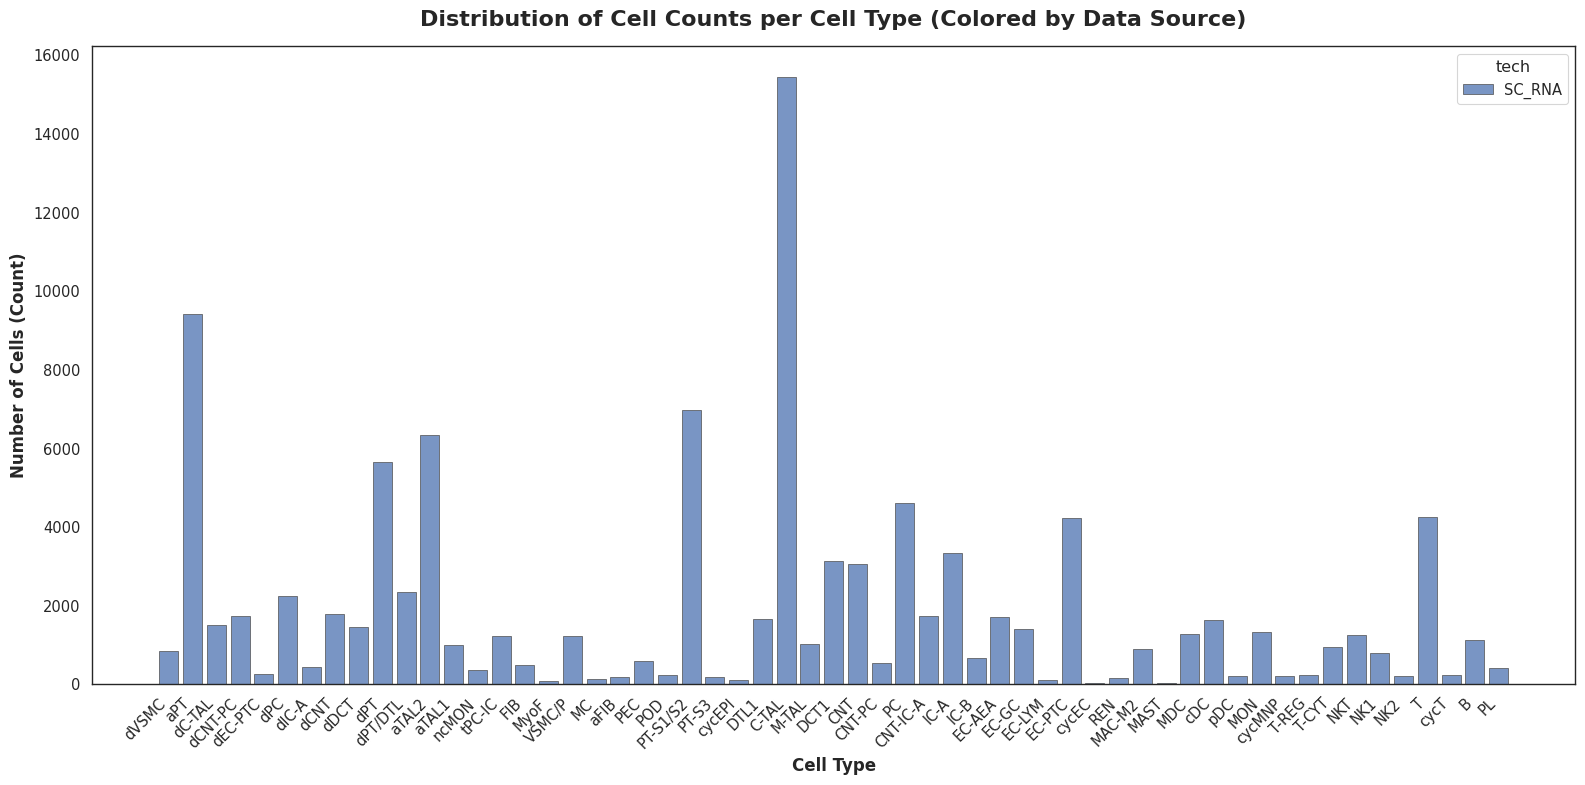

In [25]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- Configuration (Ensure these are defined if running standalone) ---
output_dir = "../../analysis/Kidnay_SC/QC"
os.makedirs(output_dir, exist_ok=True)
sns.set_theme(context="paper", style="white",
              font="DejaVu Sans", font_scale=1.2)

print("\n--- Processing Plot 1: Tech vs Cell Type (Histogram) ---")

# 1. Filter Data
if "celltype" in adata.obs.columns and "tech" in adata.obs.columns:
    # Create a clean subset with no missing values
    adata_annot = adata[adata.obs["celltype"].notna() &
                        adata.obs["tech"].notna()].copy()

    # 2. Create Count Table (Still useful for the CSV export)
    count_table = (
        adata_annot.obs
        .groupby(["tech", "celltype"])
        .size()
        .reset_index(name="cell_count")
        .pivot(index="tech", columns="celltype", values="cell_count")
        .fillna(0)
        .astype(int)
    )

    # 3. Save Data (CSV)
    csv_path = os.path.join(output_dir, "01_data_tech_vs_celltype_counts.csv")
    count_table.to_csv(csv_path)
    print(f"💾 Data saved: {csv_path}")

    # 4. Generate Histogram Plot
    # We use adata_annot.obs directly because histplot handles the counting
    plt.figure(figsize=(16, 8))

    sns.histplot(
        data=adata_annot.obs,
        x="celltype",
        hue="tech",
        multiple="stack",  # This stacks the 'tech' counts on top of each other
        shrink=0.8,        # Adds a little space between bars for readability
        edgecolor=".3",    # Adds a slight border to bars
        linewidth=0.5
    )

    plt.title("Distribution of Cell Counts per Cell Type (Colored by Data Source)",
              fontsize=16, fontweight="bold", pad=15)
    plt.xlabel("Cell Type", fontsize=12, fontweight="bold")
    plt.ylabel("Number of Cells (Count)", fontsize=12, fontweight="bold")

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha="right")

    # Clean up layout
    plt.tight_layout()

    # 5. Save Plots
    # Changed filename from 'heatmap' to 'histogram'
    plt.savefig(os.path.join(
        output_dir, "01_plot_tech_vs_celltype_histogram.png"), dpi=300)
    plt.savefig(os.path.join(
        output_dir, "01_plot_tech_vs_celltype_histogram.pdf"), dpi=300)

    print("✅ Plot 1 saved as histogram.")
    plt.show()
    plt.close()

else:
    print("⚠️ Skipping Plot 1: 'celltype' or 'tech' columns missing.")



--- Processing Plot 02: SC_RNA Disease Type Counts (Simple) ---


✅ Filtered: 104574 cells found for SC_RNA.
💾 Data saved: ../../analysis/Kidnay_SC/QC/02_data_sc_rna_disease_counts.csv
✅ Plot 02 saved.


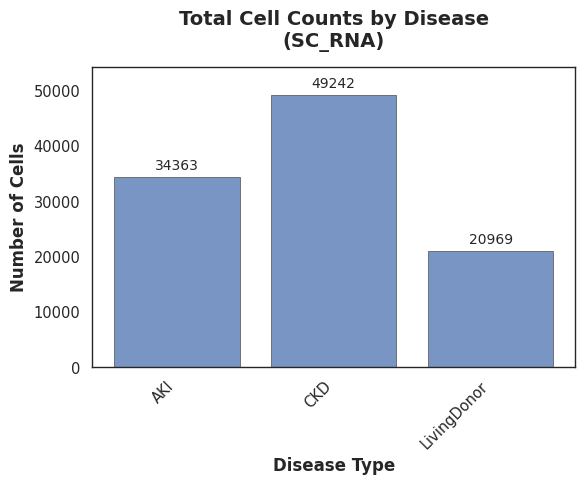

In [35]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- Configuration ---
output_dir = "../../analysis/Kidnay_SC/QC"
os.makedirs(output_dir, exist_ok=True)
sns.set_theme(context="paper", style="white",
              font="DejaVu Sans", font_scale=1.2)

print("\n--- Processing Plot 02: SC_RNA Disease Type Counts (Simple) ---")

# --- 1. Filter Data for SC_RNA ---
target_tech = "SC_RNA"

if "tech" in adata.obs.columns and "diseasetype" in adata.obs.columns:
    # Filter
    adata_sc = adata[
        (adata.obs["tech"] == target_tech) &
        (adata.obs["diseasetype"].notna())
    ].copy()

    if adata_sc.n_obs == 0:
        print(f"⚠️ Warning: No cells found for tech '{target_tech}'.")
    else:
        print(f"✅ Filtered: {adata_sc.n_obs} cells found for {target_tech}.")

        # --- 2. Save Data (Disease Counts) ---
        # Calculate simple counts per disease
        disease_counts = adata_sc.obs["diseasetype"].value_counts(
        ).reset_index()
        disease_counts.columns = ["diseasetype", "n_cells"]

        csv_path = os.path.join(
            output_dir, "02_data_sc_rna_disease_counts.csv")
        disease_counts.to_csv(csv_path, index=False)
        print(f"💾 Data saved: {csv_path}")

        # --- 3. Generate Small Histogram ---
        # Reduced figsize for a "small" plot
        plt.figure(figsize=(6, 5))

        # Simple histogram of counts (no hue/stacking, no legend needed)
        ax = sns.histplot(
            data=adata_sc.obs,
            x="diseasetype",
            shrink=0.8,       # Gaps between bars
            color="#4c72b0",  # Simple solid blue color
            edgecolor=".3",
            linewidth=0.5
        )

        # Add the actual numbers on top of the bars
        ax.bar_label(ax.containers[0], fontsize=10, padding=3)

        # Labels
        plt.title(f"Total Cell Counts by Disease\n({target_tech})",
                  fontsize=14, fontweight="bold", pad=15)
        plt.xlabel("Disease Type", fontsize=12, fontweight="bold")
        plt.ylabel("Number of Cells", fontsize=12, fontweight="bold")

        plt.xticks(rotation=45, ha="right")

        # Increase top margin slightly to fit the labels
        plt.margins(y=0.1)
        plt.tight_layout()

        # --- 4. Save Plots ---
        plt.savefig(os.path.join(
            output_dir, "02_plot_sc_rna_disease_histogram.png"), dpi=300, bbox_inches='tight')
        plt.savefig(os.path.join(
            output_dir, "02_plot_sc_rna_disease_histogram.pdf"), dpi=300, bbox_inches='tight')

        print("✅ Plot 02 saved.")
        plt.show()
        plt.close()

else:
    print("❌ Error: Missing 'tech' or 'diseasetype' columns in adata.")



--- Processing Plot 03: SC_RNA Gene Expression Dot Plot ---
⏳ Filtering for tech = 'SC_RNA'...


✅ Using 104574 cells from SC_RNA.
⏳ Calculating statistics for CSV export...
💾 Data saved: ../../analysis/Kidnay_SC/QC/03_data_sc_rna_gene_dotplot.csv
⏳ Generating Dot Plot...
✅ Plot 03 saved to:
  - ../../analysis/Kidnay_SC/QC/03_plot_sc_rna_gene_dotplot.png
  - ../../analysis/Kidnay_SC/QC/03_plot_sc_rna_gene_dotplot.pdf


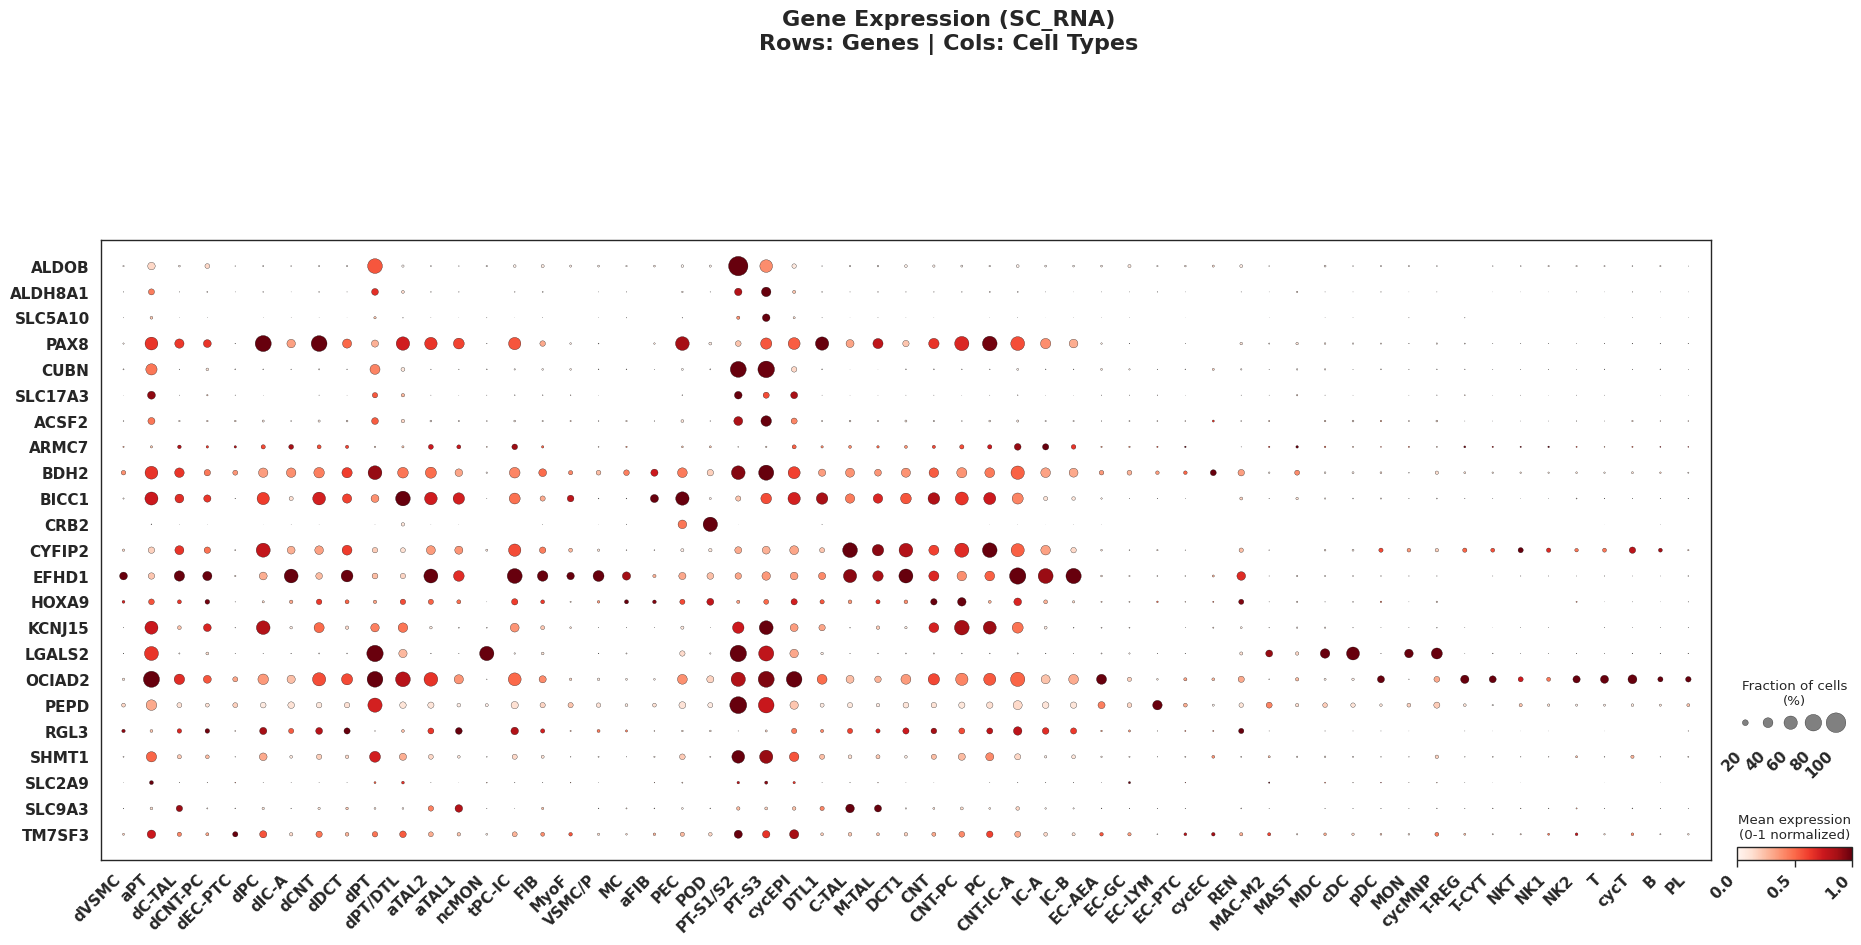

In [23]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuration ---
output_dir = "../../analysis/Kidnay_SC/QC"
os.makedirs(output_dir, exist_ok=True)
sns.set_theme(context="paper", style="white",
              font="DejaVu Sans", font_scale=1.2)

print("\n--- Processing Plot 03: SC_RNA Gene Expression Dot Plot ---")

# --- 1. Filter for SC_RNA Only ---
target_tech = "SC_RNA"
print(f"⏳ Filtering for tech = '{target_tech}'...")

if "tech" not in adata.obs.columns:
    raise KeyError("❌ 'tech' column not found.")

adata_sc = adata[
    (adata.obs["tech"] == target_tech) &
    (adata.obs["celltype"].notna())
].copy()

if adata_sc.n_obs == 0:
    raise ValueError(f"❌ No cells found for tech '{target_tech}'.")

print(f"✅ Using {adata_sc.n_obs} cells from {target_tech}.")

# --- 2. Define Genes ---
genes_of_interest = [
    "ALDOB", "ALDH8A1", "NAT8B", "SLC5A10", "PAX8", "CUBN", "SLC17A3", "ACSF2", "ARMC7",
    "BDH2", "BICC1", "CRB2", "CYFIP2", "EFHD1", "HOXA9", "KCNJ15", "LGALS2", "OCIAD2",
    "PEPD", "RGL3", "SHMT1", "SLC2A9", "SLC9A3", "TM7SF3"
]

# Ensure genes exist in raw
if adata_sc.raw is None:
    raise ValueError("❌ adata.raw is missing.")

genes_available = [g for g in genes_of_interest if g in adata_sc.raw.var_names]
if not genes_available:
    raise ValueError("❌ No valid genes found in adata.raw")

# --- 3. Calculate Statistics for CSV Export ---
print("⏳ Calculating statistics for CSV export...")
data_rows = []
unique_celltypes = adata_sc.obs["celltype"].unique()

for ct in unique_celltypes:
    subset = adata_sc[adata_sc.obs["celltype"] == ct]
    if subset.n_obs == 0:
        continue

    # Get raw data matrix
    raw_data = subset.raw[:, genes_available].X
    if hasattr(raw_data, "toarray"):
        raw_data = raw_data.toarray()

    # Calculate stats
    means = np.mean(raw_data, axis=0)
    fraction = np.count_nonzero(raw_data, axis=0) / raw_data.shape[0] * 100

    for i, gene in enumerate(genes_available):
        data_rows.append({
            "tech": target_tech,
            "celltype": ct,
            "gene": gene,
            "mean_expression": means[i],
            "percent_expressed": fraction[i]
        })

# Save Data
df_dotplot = pd.DataFrame(data_rows)
# Sort for cleaner CSV
df_dotplot = df_dotplot.sort_values(["celltype", "gene"])
csv_path = os.path.join(output_dir, "03_data_sc_rna_gene_dotplot.csv")
df_dotplot.to_csv(csv_path, index=False)
print(f"💾 Data saved: {csv_path}")

# --- 4. Generate Dot Plot ---
print("⏳ Generating Dot Plot...")

# Use swap_axes=True to make Genes = Rows and Groups (Cell Types) = Columns
sc.pl.dotplot(
    adata_sc,
    genes_available,
    groupby="celltype",
    use_raw=True,
    standard_scale='var',  # Normalizes 0-1 per gene
    swap_axes=True,        # <--- KEY CHANGE: Genes become rows
    cmap="Reds",
    colorbar_title='Mean expression\n(0-1 normalized)',
    size_title='Fraction of cells\n(%)',
    show=False
)

# --- 5. Customize Layout ---
# Robustly get current figure
fig = plt.gcf()

# Loop through axes to apply rotation to Cell Types (which are now on X-axis)
for ax in fig.axes:
    # We look for axes that have ticks
    if len(ax.get_xticklabels()) > 0:
        plt.setp(ax.get_xticklabels(), rotation=45,
                 ha="right", fontsize=11, fontweight="bold")
        plt.setp(ax.get_yticklabels(), fontsize=11, fontweight="bold")

# Title
fig.suptitle(f"Gene Expression ({target_tech})\nRows: Genes | Cols: Cell Types",
             y=1.05, fontsize=16, fontweight='bold')

# --- 6. Save Plots ---
png_path = os.path.join(output_dir, "03_plot_sc_rna_gene_dotplot.png")
pdf_path = os.path.join(output_dir, "03_plot_sc_rna_gene_dotplot.pdf")

# Tight layout is crucial here to prevent labels being cut off
fig.savefig(png_path, dpi=300, bbox_inches='tight')
fig.savefig(pdf_path, dpi=300, bbox_inches='tight')

print(f"✅ Plot 03 saved to:\n  - {png_path}\n  - {pdf_path}")

plt.show()
plt.close()



--- Processing Plot 04: SC_RNA Expression (Cell Type x Disease) ---
⏳ Filtering for tech = 'SC_RNA'...
⏳ Calculating statistics for CSV export...
💾 Data saved: ../../analysis/Kidnay_SC/QC/04_data_sc_rna_disease_compare.csv
⏳ Generating Dot Plot...
✅ Plot 04 saved to:
  - ../../analysis/Kidnay_SC/QC/04_plot_sc_rna_disease_compare.png
  - ../../analysis/Kidnay_SC/QC/04_plot_sc_rna_disease_compare.pdf


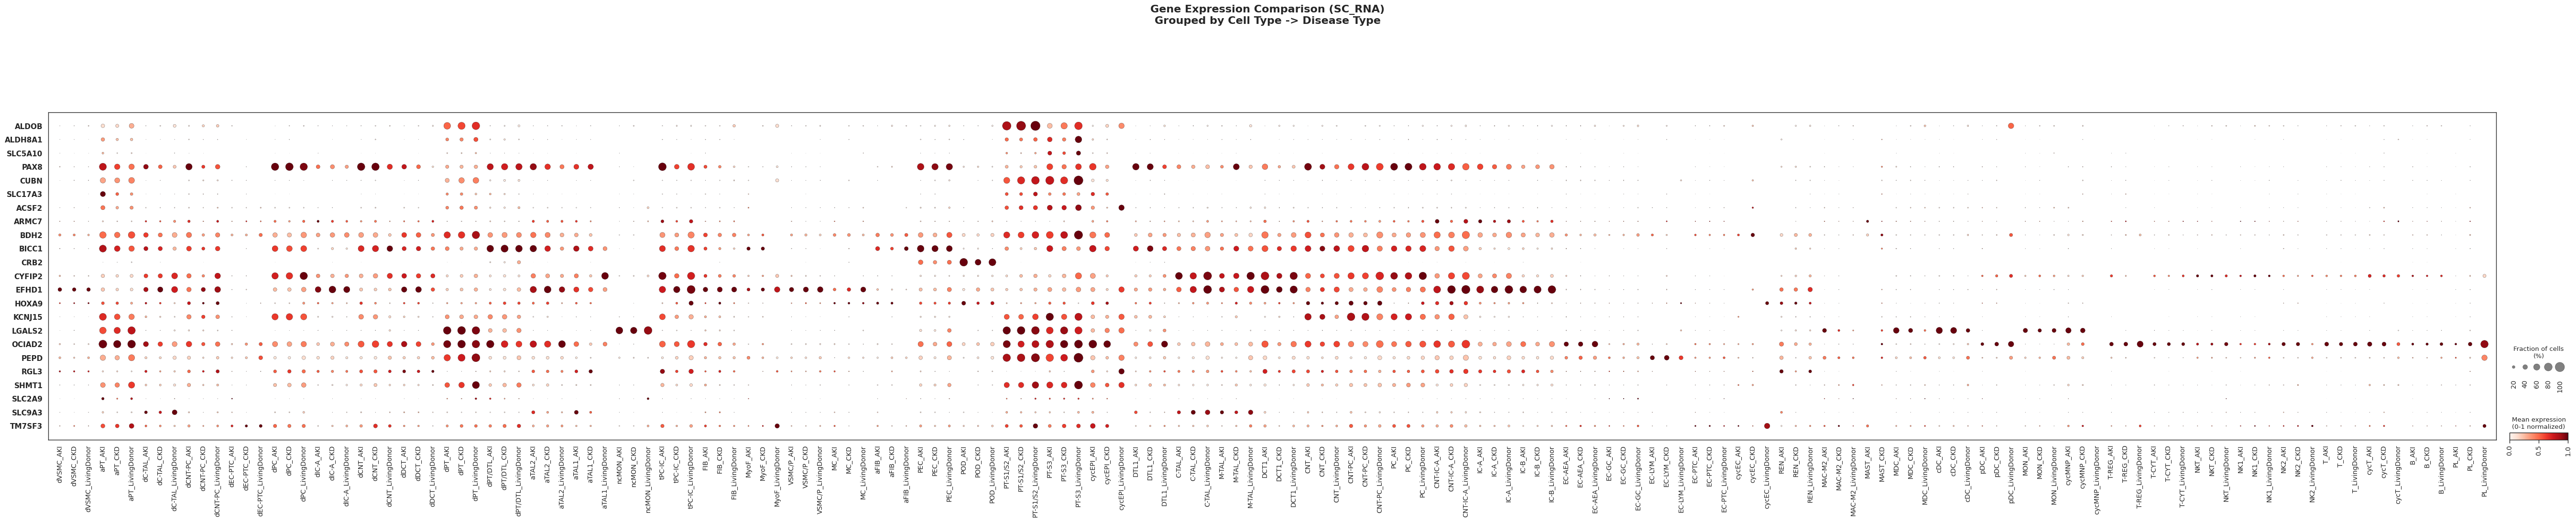

In [26]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuration ---
output_dir = "../../analysis/Kidnay_SC/QC"
os.makedirs(output_dir, exist_ok=True)
sns.set_theme(context="paper", style="white",
              font="DejaVu Sans", font_scale=1.2)

print("\n--- Processing Plot 04: SC_RNA Expression (Cell Type x Disease) ---")

# --- 1. Filter for SC_RNA Only ---
target_tech = "SC_RNA"
print(f"⏳ Filtering for tech = '{target_tech}'...")

# Ensure columns exist
for col in ["tech", "celltype", "diseasetype"]:
    if col not in adata.obs.columns:
        raise KeyError(f"❌ '{col}' column not found.")

# Filter Data
adata_sc = adata[
    (adata.obs["tech"] == target_tech) &
    (adata.obs["celltype"].notna()) &
    (adata.obs["diseasetype"].notna())
].copy()

if adata_sc.n_obs == 0:
    raise ValueError(f"❌ No cells found for tech '{target_tech}'.")

# --- 2. Define Genes ---
genes_of_interest = [
    "ALDOB", "ALDH8A1", "NAT8B", "SLC5A10", "PAX8", "CUBN", "SLC17A3", "ACSF2", "ARMC7",
    "BDH2", "BICC1", "CRB2", "CYFIP2", "EFHD1", "HOXA9", "KCNJ15", "LGALS2", "OCIAD2",
    "PEPD", "RGL3", "SHMT1", "SLC2A9", "SLC9A3", "TM7SF3"
]

# Ensure genes exist in raw
if adata_sc.raw is None:
    raise ValueError("❌ adata.raw is missing.")

genes_available = [g for g in genes_of_interest if g in adata_sc.raw.var_names]
if not genes_available:
    raise ValueError("❌ No valid genes found in adata.raw")

# --- 3. Calculate Statistics for CSV Export ---
print("⏳ Calculating statistics for CSV export...")
data_rows = []

# Get unique combinations
combinations = adata_sc.obs[["celltype",
                             "diseasetype"]].drop_duplicates().values

for ctype, dtype in combinations:
    # Subset specific group
    mask = (adata_sc.obs["celltype"] == ctype) & (
        adata_sc.obs["diseasetype"] == dtype)
    subset = adata_sc[mask]

    if subset.n_obs == 0:
        continue

    # Get raw data matrix
    raw_data = subset.raw[:, genes_available].X
    if hasattr(raw_data, "toarray"):
        raw_data = raw_data.toarray()

    # Calculate stats
    means = np.mean(raw_data, axis=0)
    fraction = np.count_nonzero(raw_data, axis=0) / raw_data.shape[0] * 100

    for i, gene in enumerate(genes_available):
        data_rows.append({
            "tech": target_tech,
            "celltype": ctype,
            "diseasetype": dtype,
            "gene": gene,
            "mean_expression": means[i],
            "percent_expressed": fraction[i]
        })

# Save Data
df_dotplot = pd.DataFrame(data_rows)
df_dotplot = df_dotplot.sort_values(["celltype", "diseasetype", "gene"])
csv_path = os.path.join(output_dir, "04_data_sc_rna_disease_compare.csv")
df_dotplot.to_csv(csv_path, index=False)
print(f"💾 Data saved: {csv_path}")

# --- 4. Generate Dot Plot ---
print("⏳ Generating Dot Plot...")

# groupby=['celltype', 'diseasetype'] nests the groups
# swap_axes=True ensures Genes are Rows
sc.pl.dotplot(
    adata_sc,
    genes_available,
    groupby=['celltype', 'diseasetype'],
    use_raw=True,
    standard_scale='var',  # Normalize 0-1 per gene
    swap_axes=True,        # Genes = Rows
    cmap="Reds",
    colorbar_title='Mean expression\n(0-1 normalized)',
    size_title='Fraction of cells\n(%)',
    show=False
)

# --- 5. Customize Layout ---
fig = plt.gcf()

# Adjust size dynamically based on number of columns (celltypes * diseases)
num_cols = len(combinations)
# Width scales with data, Height fixed
fig.set_size_inches(max(10, num_cols * 0.4), 10)

for ax in fig.axes:
    if len(ax.get_xticklabels()) > 0:
        # Rotate labels 90 degrees for readability since there are two levels
        plt.setp(ax.get_xticklabels(), rotation=90, ha="center", fontsize=10)
        plt.setp(ax.get_yticklabels(), fontsize=11, fontweight="bold")

# Title
fig.suptitle(f"Gene Expression Comparison ({target_tech})\nGrouped by Cell Type -> Disease Type",
             y=1.02, fontsize=16, fontweight='bold')

# --- 6. Save Plots ---
png_path = os.path.join(output_dir, "04_plot_sc_rna_disease_compare.png")
pdf_path = os.path.join(output_dir, "04_plot_sc_rna_disease_compare.pdf")

fig.savefig(png_path, dpi=300, bbox_inches='tight')
fig.savefig(pdf_path, dpi=300, bbox_inches='tight')

print(f"✅ Plot 04 saved to:\n  - {png_path}\n  - {pdf_path}")

plt.show()
plt.close()


In [27]:
# Get just the names as a list
print(adata.obs["celltype"].unique().tolist())


[nan, 'dPT/DTL', 'EC-AEA', 'T-CYT', 'aTAL2', 'T', 'dPC', 'aPT', 'MAC-M2', 'EC-PTC', 'CNT-IC-A', 'B', 'dC-TAL', 'FIB', 'NK1', 'M-TAL', 'dPT', 'NKT', 'cDC', 'MON', 'PT-S1/S2', 'dCNT', 'DTL1', 'PL', 'dDCT', 'pDC', 'CNT', 'PC', 'aFIB', 'PEC', 'dCNT-PC', 'CNT-PC', 'ncMON', 'aTAL1', 'tPC-IC', 'NK2', 'C-TAL', 'VSMC/P', 'IC-B', 'T-REG', 'EC-LYM', 'IC-A', 'cycMNP', 'cycT', 'MDC', 'dVSMC', 'MAST', 'MyoF', 'cycEPI', 'dIC-A', 'DCT1', 'PT-S3', 'dEC-PTC', 'REN', 'EC-GC', 'MC', 'cycEC', 'POD']



--- Processing Plot 05: Targeted PT/TAL Injury Analysis ---
⏳ Filtering for tech='SC_RNA' and selected cell types...
✅ Subset contains 47517 cells.
⏳ Calculating statistics...
💾 Data saved: ../../analysis/Kidnay_SC/QC/05_data_target_injury_analysis.csv
⏳ Generating Plot...
✅ Plot 05 saved to:
  - ../../analysis/Kidnay_SC/QC/05_plot_target_injury_analysis.png
  - ../../analysis/Kidnay_SC/QC/05_plot_target_injury_analysis.pdf


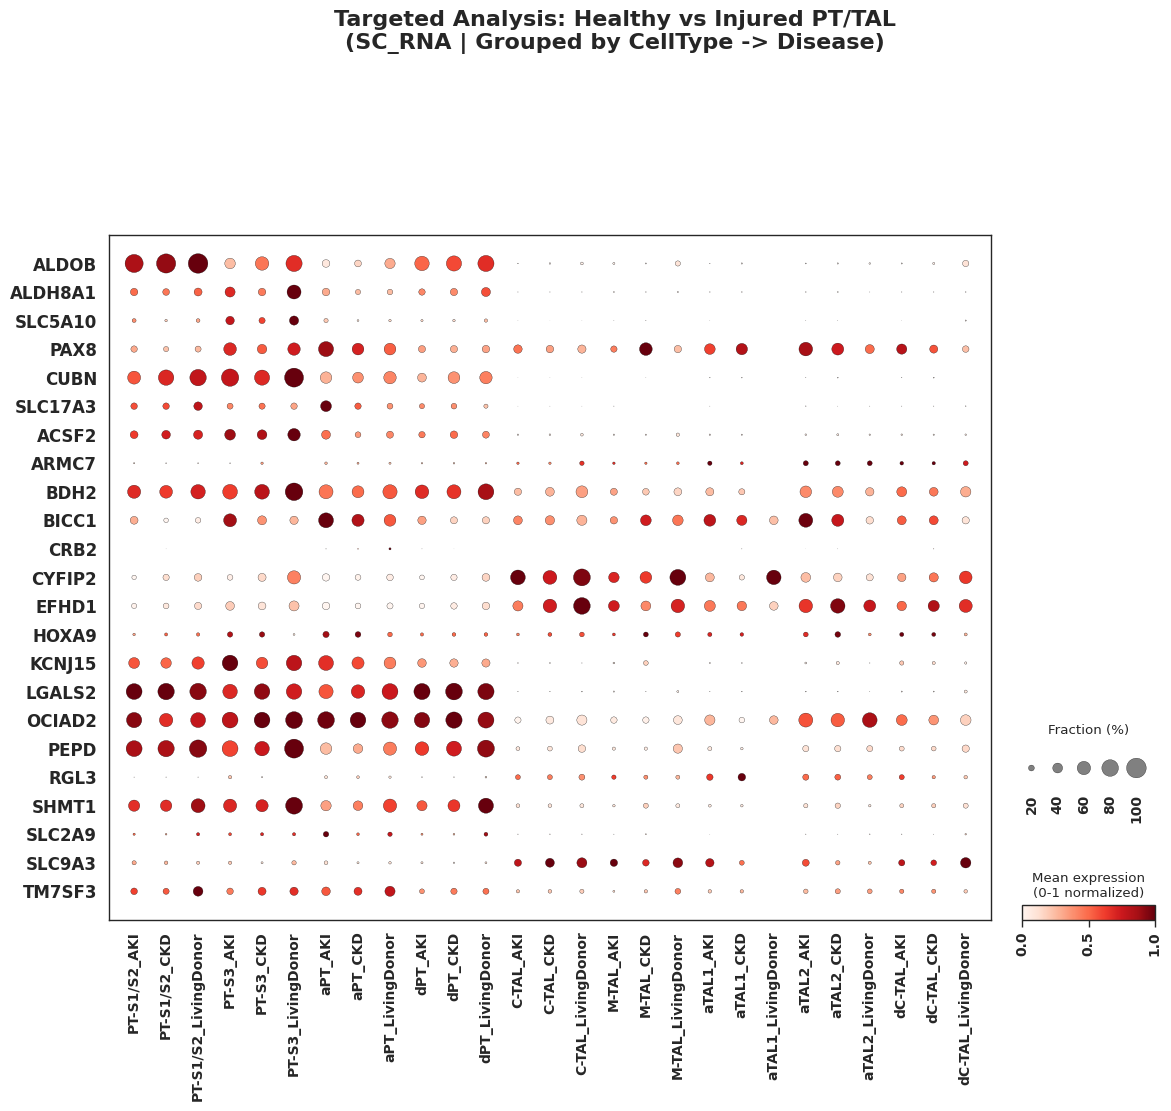

In [28]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuration ---
output_dir = "../../analysis/Kidnay_SC/QC"
os.makedirs(output_dir, exist_ok=True)
sns.set_theme(context="paper", style="white",
              font="DejaVu Sans", font_scale=1.2)

print("\n--- Processing Plot 05: Targeted PT/TAL Injury Analysis ---")

# --- 1. Define Target Lists ---
target_celltypes = [
    'PT-S1/S2', 'PT-S3', 'aPT', 'dPT',           # Proximal Tubule
    'C-TAL', 'M-TAL', 'aTAL1', 'aTAL2', 'dC-TAL'  # Thick Ascending Limb
]

# Genes from previous steps
genes_of_interest = [
    "ALDOB", "ALDH8A1", "NAT8B", "SLC5A10", "PAX8", "CUBN", "SLC17A3", "ACSF2", "ARMC7",
    "BDH2", "BICC1", "CRB2", "CYFIP2", "EFHD1", "HOXA9", "KCNJ15", "LGALS2", "OCIAD2",
    "PEPD", "RGL3", "SHMT1", "SLC2A9", "SLC9A3", "TM7SF3"
]

# --- 2. Filter Data (SC_RNA + Target Cell Types) ---
target_tech = "SC_RNA"
print(f"⏳ Filtering for tech='{target_tech}' and selected cell types...")

adata_subset = adata[
    (adata.obs["tech"] == target_tech) &
    (adata.obs["celltype"].isin(target_celltypes)) &
    (adata.obs["diseasetype"].notna())
].copy()

if adata_subset.n_obs == 0:
    raise ValueError("❌ No cells found matching criteria.")

print(f"✅ Subset contains {adata_subset.n_obs} cells.")

# --- 3. Enforce Logical Sorting Order ---
# We want Healthy PT -> Injured PT -> Healthy TAL -> Injured TAL
adata_subset.obs["celltype"] = pd.Categorical(
    adata_subset.obs["celltype"],
    categories=target_celltypes,
    ordered=True
)

# --- 4. Prepare Genes ---
if adata_subset.raw is None:
    raise ValueError("❌ adata.raw is missing.")
genes_available = [
    g for g in genes_of_interest if g in adata_subset.raw.var_names]

# --- 5. Generate Stats for CSV ---
print("⏳ Calculating statistics...")
data_rows = []
combinations = adata_subset.obs[["celltype",
                                 "diseasetype"]].drop_duplicates().values

for ctype, dtype in combinations:
    mask = (adata_subset.obs["celltype"] == ctype) & (
        adata_subset.obs["diseasetype"] == dtype)
    subset = adata_subset[mask]
    if subset.n_obs == 0:
        continue

    raw_data = subset.raw[:, genes_available].X
    if hasattr(raw_data, "toarray"):
        raw_data = raw_data.toarray()

    means = np.mean(raw_data, axis=0)
    fraction = np.count_nonzero(raw_data, axis=0) / raw_data.shape[0] * 100

    for i, gene in enumerate(genes_available):
        data_rows.append({
            "celltype": ctype,
            "diseasetype": dtype,
            "gene": gene,
            "mean_expression": means[i],
            "percent_expressed": fraction[i]
        })

df_out = pd.DataFrame(data_rows).sort_values(
    ["celltype", "diseasetype", "gene"])
csv_path = os.path.join(output_dir, "05_data_target_injury_analysis.csv")
df_out.to_csv(csv_path, index=False)
print(f"💾 Data saved: {csv_path}")

# --- 6. Generate Dot Plot ---
print("⏳ Generating Plot...")

sc.pl.dotplot(
    adata_subset,
    genes_available,
    groupby=['celltype', 'diseasetype'],  # Compare Disease within Cell Type
    use_raw=True,
    standard_scale='var',
    swap_axes=True,
    cmap="Reds",
    colorbar_title='Mean expression\n(0-1 normalized)',
    size_title='Fraction (%)\n',
    show=False
)

# --- 7. Customize Layout ---
fig = plt.gcf()
# Adjust width: 0.5 inches per column (celltype*disease combos)
num_cols = len(combinations)
fig.set_size_inches(max(12, num_cols * 0.5), 10)

for ax in fig.axes:
    if len(ax.get_xticklabels()) > 0:
        # Rotate labels 90 degrees
        plt.setp(ax.get_xticklabels(), rotation=90,
                 ha="center", fontsize=10, fontweight="bold")
        plt.setp(ax.get_yticklabels(), fontsize=12, fontweight="bold")

fig.suptitle(f"Targeted Analysis: Healthy vs Injured PT/TAL\n({target_tech} | Grouped by CellType -> Disease)",
             y=1.02, fontsize=16, fontweight='bold')

# --- 8. Save ---
png_path = os.path.join(output_dir, "05_plot_target_injury_analysis.png")
pdf_path = os.path.join(output_dir, "05_plot_target_injury_analysis.pdf")

fig.savefig(png_path, dpi=300, bbox_inches='tight')
fig.savefig(pdf_path, dpi=300, bbox_inches='tight')

print(f"✅ Plot 05 saved to:\n  - {png_path}\n  - {pdf_path}")
plt.show()
plt.close()



--- Processing Plot 06: Vertical Layout + CSV Export ---
⏳ Filtering for tech='SC_RNA'...


⏳ Calculating statistics for CSV export...
💾 Data saved: ../../analysis/Kidnay_SC/QC/06_data_vertical_injury_analysis.csv
⏳ Generating Vertical Dot Plot...
✅ Plot 06 (Vertical) saved to:
  - ../../analysis/Kidnay_SC/QC/06_plot_vertical_injury_analysis.png
  - ../../analysis/Kidnay_SC/QC/06_plot_vertical_injury_analysis.pdf


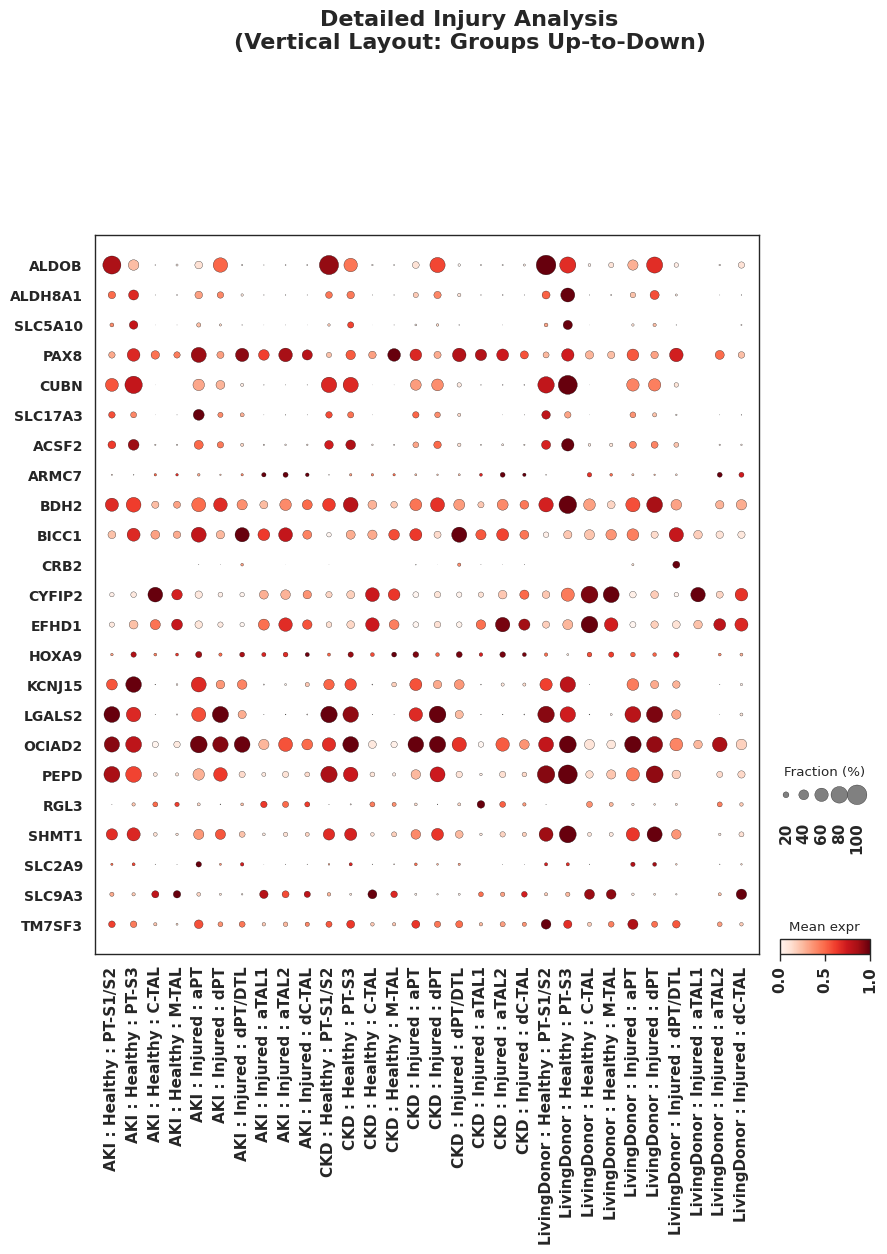

In [36]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuration ---
output_dir = "../../analysis/Kidnay_SC/QC"
os.makedirs(output_dir, exist_ok=True)
sns.set_theme(context="paper", style="white",
              font="DejaVu Sans", font_scale=1.2)

print("\n--- Processing Plot 06: Vertical Layout + CSV Export ---")

# --- 1. Define Groups & Targets ---
healthy_pt = ['PT-S1/S2', 'PT-S3']
injured_pt = ['aPT', 'dPT', 'dPT/DTL']
healthy_tal = ['C-TAL', 'M-TAL']
injured_tal = ['aTAL1', 'aTAL2', 'dC-TAL']
all_targets = healthy_pt + injured_pt + healthy_tal + injured_tal

genes_of_interest = [
    "ALDOB", "ALDH8A1", "NAT8B", "SLC5A10", "PAX8", "CUBN", "SLC17A3", "ACSF2", "ARMC7",
    "BDH2", "BICC1", "CRB2", "CYFIP2", "EFHD1", "HOXA9", "KCNJ15", "LGALS2", "OCIAD2",
    "PEPD", "RGL3", "SHMT1", "SLC2A9", "SLC9A3", "TM7SF3"
]

# --- 2. Filter Data ---
target_tech = "SC_RNA"
print(f"⏳ Filtering for tech='{target_tech}'...")

adata_subset = adata[
    (adata.obs["tech"] == target_tech) &
    (adata.obs["celltype"].isin(all_targets)) &
    (adata.obs["diseasetype"].notna())
].copy()

# --- 3. Create Annotations ---


def get_state(ctype):
    if ctype in healthy_pt or ctype in healthy_tal:
        return "Healthy"
    if ctype in injured_pt or ctype in injured_tal:
        return "Injured"
    return "Other"


adata_subset.obs['cell_state'] = adata_subset.obs['celltype'].apply(get_state)

# Create the master grouping string
adata_subset.obs['plotting_group'] = (
    adata_subset.obs['diseasetype'].astype(str) + " : " +
    adata_subset.obs['cell_state'].astype(str) + " : " +
    adata_subset.obs['celltype'].astype(str)
)

# --- 4. Define Sort Order (Disease -> Healthy -> Injured) ---
ordered_categories = []
sorted_diseases = sorted(adata_subset.obs['diseasetype'].unique())

for dtype in sorted_diseases:
    for state in ["Healthy", "Injured"]:
        current_types = (
            healthy_pt + healthy_tal) if state == "Healthy" else (injured_pt + injured_tal)
        for ctype in current_types:
            group_name = f"{dtype} : {state} : {ctype}"
            if group_name in adata_subset.obs['plotting_group'].values:
                ordered_categories.append(group_name)

adata_subset.obs['plotting_group'] = pd.Categorical(
    adata_subset.obs['plotting_group'],
    categories=ordered_categories,
    ordered=True
)

# --- 5. Prepare Genes ---
if adata_subset.raw is None:
    raise ValueError("❌ adata.raw is missing.")
genes_available = [
    g for g in genes_of_interest if g in adata_subset.raw.var_names]

# --- 6. Calculate Statistics & Save CSV ---
print("⏳ Calculating statistics for CSV export...")
data_rows = []

# Iterate through the unique groups defined in our sort order
for group in ordered_categories:
    subset = adata_subset[adata_subset.obs['plotting_group'] == group]
    if subset.n_obs == 0:
        continue

    # Extract metadata components from the first cell (safe since they are grouped)
    dtype = subset.obs['diseasetype'].iloc[0]
    state = subset.obs['cell_state'].iloc[0]
    ctype = subset.obs['celltype'].iloc[0]

    # Get Expression Data
    raw_data = subset.raw[:, genes_available].X
    if hasattr(raw_data, "toarray"):
        raw_data = raw_data.toarray()

    means = np.mean(raw_data, axis=0)
    fraction = np.count_nonzero(raw_data, axis=0) / raw_data.shape[0] * 100

    for i, gene in enumerate(genes_available):
        data_rows.append({
            "plotting_group": group,  # Matches the plot label
            "diseasetype": dtype,
            "cell_state": state,
            "celltype": ctype,
            "gene": gene,
            "mean_expression": means[i],
            "percent_expressed": fraction[i],
            "n_cells": subset.n_obs
        })

# Export DataFrame
df_out = pd.DataFrame(data_rows)
csv_path = os.path.join(output_dir, "06_data_vertical_injury_analysis.csv")
df_out.to_csv(csv_path, index=False)
print(f"💾 Data saved: {csv_path}")

# --- 7. Generate Vertical Dot Plot ---
print("⏳ Generating Vertical Dot Plot...")

dp = sc.pl.dotplot(
    adata_subset,
    genes_available,
    groupby='plotting_group',
    use_raw=True,
    standard_scale='var',
    # <--- FALSE: Groups on Rows (Y-axis), Genes on Cols (X-axis)
    swap_axes=True,
    cmap="Reds",
    colorbar_title='Mean expr',
    size_title='Fraction (%)',
    show=False
)

# --- 8. Customize Layout ---
fig = plt.gcf()

# Dynamic Height Calculation (Groups are on Y-axis now)
n_rows = len(ordered_categories)
n_cols = len(genes_available)

# Approx 0.35 inches per row/col + buffer
fig_height = max(8, n_rows * 0.35)
fig_width = max(10, n_cols * 0.4)

fig.set_size_inches(fig_width, fig_height)

# Rotate Gene Labels (X-axis)
for ax in fig.axes:
    if len(ax.get_xticklabels()) > 0:
        plt.setp(ax.get_xticklabels(), rotation=90,
                 fontsize=11, fontweight="bold")
        plt.setp(ax.get_yticklabels(), fontsize=10, fontweight="bold")

fig.suptitle(f"Detailed Injury Analysis\n(Vertical Layout: Groups Up-to-Down)",
             y=1.01, fontsize=16, fontweight='bold')

# --- 9. Save Plots ---
png_path = os.path.join(output_dir, "06_plot_vertical_injury_analysis.png")
pdf_path = os.path.join(output_dir, "06_plot_vertical_injury_analysis.pdf")

fig.savefig(png_path, dpi=300, bbox_inches='tight')
fig.savefig(pdf_path, dpi=300, bbox_inches='tight')

print(f"✅ Plot 06 (Vertical) saved to:\n  - {png_path}\n  - {pdf_path}")

plt.show()
plt.close()



--- Processing Plot 07: Difference Plot (Figure 1C Style) ---
⏳ Reading data from: ../../analysis/Kidnay_SC/QC/06_data_vertical_injury_analysis.csv
💾 Data saved: ../../analysis/Kidnay_SC/QC/07_data_differential_expression_delta.csv
⏳ Generating Difference Plot...


/tmp/ipykernel_3112351/2087999959.py:50: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby(['Gene', 'Compartment', 'cell_state']).apply(weighted_mean).reset_index(name='Weighted_Mean')


✅ Plot 07 saved to:
  - ../../analysis/Kidnay_SC/QC/07_plot_differential_expression_delta.png
  - ../../analysis/Kidnay_SC/QC/07_plot_differential_expression_delta.pdf


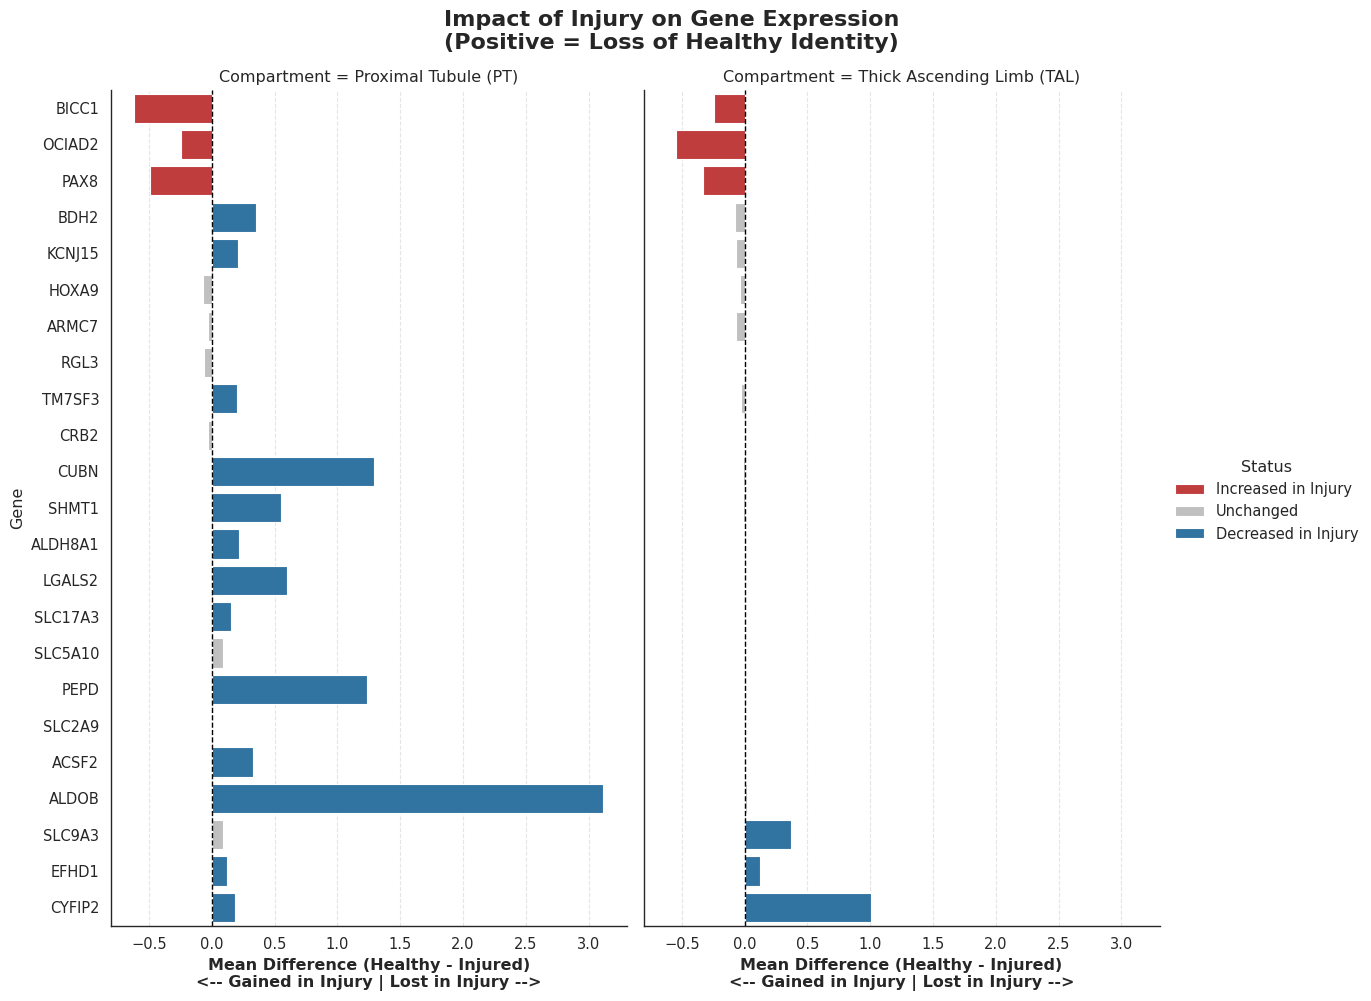

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# --- Configuration ---
output_dir = "../../analysis/Kidnay_SC/QC"
os.makedirs(output_dir, exist_ok=True)
sns.set_theme(context="paper", style="white",
              font="DejaVu Sans", font_scale=1.2)

print("\n--- Processing Plot 07: Difference Plot (Figure 1C Style) ---")

# --- 1. Load Data (from previous step) ---
# We use the detailed CSV generated in Plot 06
csv_path = os.path.join(output_dir, "06_data_vertical_injury_analysis.csv")

if not os.path.exists(csv_path):
    # Fallback if file isn't in the exact path (e.g. if you moved it)
    csv_path = "06_data_vertical_injury_analysis.csv"

print(f"⏳ Reading data from: {csv_path}")
df = pd.read_csv(csv_path)

# Ensure column names are standard (handle case variations)
if "Gene" not in df.columns and "gene" in df.columns:
    df = df.rename(columns={"gene": "Gene"})

# --- 2. Define Compartments ---
# Map specific cell types to broad compartments
pt_types = ['PT-S1/S2', 'PT-S3', 'aPT', 'dPT', 'dPT/DTL']
tal_types = ['C-TAL', 'M-TAL', 'aTAL1', 'aTAL2', 'dC-TAL']


def get_compartment(ctype):
    if ctype in pt_types:
        return "Proximal Tubule (PT)"
    if ctype in tal_types:
        return "Thick Ascending Limb (TAL)"
    return "Other"


df['Compartment'] = df['celltype'].apply(get_compartment)
# Filter out any non-PT/TAL cells if present
df = df[df['Compartment'] != "Other"]

# --- 3. Calculate Weighted Means ---
# We weight by 'n_cells' to get an accurate average across all disease subtypes


def weighted_mean(x):
    if x['n_cells'].sum() == 0:
        return 0
    return np.average(x['mean_expression'], weights=x['n_cells'])


# Group by Gene, Compartment, and Cell State (Healthy vs Injured)
grouped = df.groupby(['Gene', 'Compartment', 'cell_state']).apply(
    weighted_mean).reset_index(name='Weighted_Mean')

# Pivot to get Healthy and Injured columns side-by-side
pivoted = grouped.pivot(index=['Gene', 'Compartment'],
                        columns='cell_state', values='Weighted_Mean').reset_index()

# Fill missing values with 0
if 'Healthy' not in pivoted.columns:
    pivoted['Healthy'] = 0
if 'Injured' not in pivoted.columns:
    pivoted['Injured'] = 0
pivoted = pivoted.fillna(0)

# --- 4. Calculate Delta (The "Loss" Metric) ---
# Positive Delta = Higher in Healthy (Lost in Injury)
# Negative Delta = Higher in Injured (Gained in Injury)
pivoted['Delta'] = pivoted['Healthy'] - pivoted['Injured']

# Define Status for Coloring


def get_change(delta):
    if delta > 0.1:
        return "Decreased in Injury"  # Lost
    if delta < -0.1:
        return "Increased in Injury"  # Gained
    return "Unchanged"


pivoted['Status'] = pivoted['Delta'].apply(get_change)
# Sort by magnitude of change
pivoted = pivoted.sort_values("Delta", ascending=True)

# Save the calculated stats
output_csv = os.path.join(
    output_dir, "07_data_differential_expression_delta.csv")
pivoted.to_csv(output_csv, index=False)
print(f"💾 Data saved: {output_csv}")

# --- 5. Generate Plot ---
print("⏳ Generating Difference Plot...")

g = sns.catplot(
    data=pivoted,
    x="Delta",
    y="Gene",
    col="Compartment",
    kind="bar",
    # Blue for "Healthy Identity Genes" (Lost), Red for "Injury Markers" (Gained)
    palette={"Decreased in Injury": "#1f77b4",
             "Increased in Injury": "#d62728", "Unchanged": "silver"},
    hue="Status",
    dodge=False,
    height=10,
    aspect=0.6,
    sharey=True
)

# Customize Layout
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Impact of Injury on Gene Expression\n(Positive = Loss of Healthy Identity)",
               fontsize=16, fontweight='bold')

for ax in g.axes.flat:
    # Add a vertical line at 0
    ax.axvline(0, color="black", linewidth=1, linestyle="--")

    # Label axes clearly
    ax.set_xlabel(
        "Mean Difference (Healthy - Injured)\n<-- Gained in Injury | Lost in Injury -->", fontweight='bold')
    ax.grid(axis='x', linestyle='--', alpha=0.5)

# --- 6. Save Plot ---
png_path = os.path.join(
    output_dir, "07_plot_differential_expression_delta.png")
pdf_path = os.path.join(
    output_dir, "07_plot_differential_expression_delta.pdf")

plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.savefig(pdf_path, dpi=300, bbox_inches='tight')

print(f"✅ Plot 07 saved to:\n  - {png_path}\n  - {pdf_path}")
plt.show()
